
# Functions for Automated Seaborn Plots
![](./Sample.png)

**Greetings Entrepid Data Scientists!!** 

It's likely you've taken a wrong turn in the multi-verse - but on the off chance you're looking for functions to automatically create extremely generic Seaborn plots for data science projects (or you're just looking for a great night in) - **then you've come to the right place!**

I'm a bit of a novice (I'm an aerodynamicist by trade) and somewhat bashful about making my work public, but with this one I figured what-the-hey, maybe someone will find it useful and/or informative - like all the shared notebooks that have helped me so much!

Anyway, if I get any upvotes I'll be over the moon!! But any feedback is most welcome!!

# Contents
1. [Acknowledgements](#sec1)
2. [Imports](#sec2)   
3. [PLOTTING FUNCTIONS](#sec3)  
4. [Testing with Titanic Dataset](#sec4)
5. [Testing with Iowa House Prices Dataset](#sec5)
5. [Bonus Round - Flatten and Zip Functions](#sec6)



<a id="sec1"></a>
# Acknowledgements
Before we start I have to say this [article](https://medium.com/@rayheberer/generating-matplotlib-subplots-programmatically-cc234629b648) by Ray Herberer on Medium.com was very useful, in particular for showing me the numpy flatten function. For more explanation and a visualisation of how this and zip functions are used check out the [Bonus Round](#Bonus+Round+-+Flatten+and+Zip+Functions) at the end of the Notebook!

I also need to reference a [notebook](https://www.kaggle.com/angqx95/data-science-workflow-top-2-with-tuning) from Kaggle user '[apx](https://www.kaggle.com/angqx95/data-science-workflow-top-2-with-tuning)', just because I found it so useful in so many ways - check it out and spread the love with the upvotes. Any plagiarism for this notebook is probably sub-conscious as I have chosen to use pyplot.subplots as opposed to pyplot.subplot (subtle differences!) that I saw 'apx' using. If you want to know something of these differences then best to try out both, but this [article](https://towardsdatascience.com/plt-subplot-or-plt-subplots-understanding-state-based-vs-object-oriented-programming-in-pyplot-4ba0c7283f5d) has a picture of Ouroboros so you know it must be good...

<a id="sec2"></a>
# Imports

In [1]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

<a id="sec3"></a>
# Plotting Functions

This section has the code for the plotting functions themselves.  There is so much you can do with the [matplotlib.axes](https://matplotlib.org/3.3.2/api/axes_api.html) class - but I've kept it simple and just used a set_title using the feature name. There are also many other useful plots but for me this was a fun experiment to write a nice notebook to share rather than an exhaustive library. If anyone uses these as a base for their own work then I'd love to see what plots/styles/features you can adapt them for!    

**List of Functions:**

1. [countplots](#sec3.1): returns column barcharts for discrete numerical and categorical features  
2. [countplots_by_target](#sec3.2): same as countplots but splits counts for specified 'Target'. Works best for classification problems like the Titanic competition  
3. [barplots](#sec3.3): does what it says on the tin - again for discrete numerical and categorical features  
4. [distplots](#sec3.4): distribution plots (histograms) for continuous numerical features  
5. [barplots_mean_target](#sec3.5): plot the mean target values across categorical values (for numerical targets only, such as Iowa House Prices Competition)  
6. [scatterplots](#sec3.6): scatter plots for numerical features vs target feature

**Inputs Required:**
* **cols** - List of features (column headings) from dataframe that you would like to plot
* **data** - Pandas Dataframe containing data that you would like to plot
* **width factor & height factor** - Default value=1. Functions are set-up to automatically size the figures according to number of subplots to ensure consistency but you can tweak the aspect ratio by changing these factors if you please

**Additional Input for 'countplots_by_target' and 'barplots_mean_target' functions:**

* **target** - String of target column name to set the the 'hue' in countplots. This gives you the counts split by a given feature, such as 'Survived' in the Titanic dataset shown below. Can choose any categorical or discrete numerical feature of interest but choosing the Target on a classification problem is a good place to start.

**Additional Input for 'distplots' function:**

* **kde** - default value=False. I find problems plotting kde for large lists of unscaled features (if anybody knows exactly why let me know!). Sometimes can be useful to plot the kde, so it's up to you!


<a id="sec3.1"></a>
# 'countplots'

In [2]:
def countplots(cols, data, width_factor=1, height_factor=1):
    '''Barplots of counts for disc_numeric and cat features
    automatic sizing and number of rows/columns'''
    #define number of rows and columns based on length of feature list
    ncols = min(math.ceil(len(cols)**0.5),4)
    nrows = math.ceil(len(cols)/ncols)
    #create plots looping through the feature list
    fig, axs = plt.subplots(nrows,ncols,figsize=(ncols*4*width_factor, nrows*4))
    for ax, feature in zip(axs.flatten(), cols):
        sns.countplot(x=feature,data=data, ax=ax)
        #set title and x-axis label rotation (here would be the place to add further axes methods)
        ax.set_title(feature)
        ax.tick_params(axis='x',labelrotation=45)
    #remove unused axs    
    unused_axs = (nrows*ncols)-len(cols)
    for unused_axs in range(unused_axs):
        axs[nrows-1, -1-unused_axs].remove()
    #snug fit!  
    fig.tight_layout(pad=1.5)

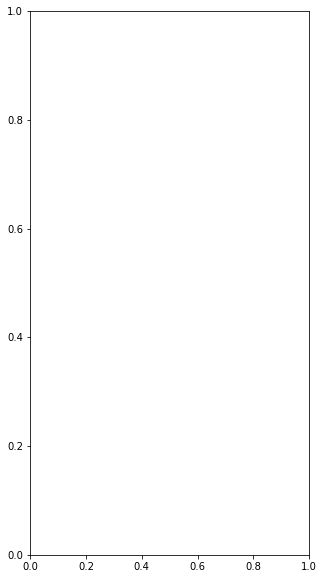

In [4]:
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,10))

<a id="sec3.2"></a>
# 'countplots_by_target'

In [3]:
def countplots_by_target(cols, data, target, width_factor=1, height_factor=1):
    '''Barplots of counts of target variable for discrete
    numeric and categorical features'''
    #define number of rows and columns based on length of feature list
    ncols = min(math.ceil(len(cols)**0.5),4)
    nrows = math.ceil(len(cols)/ncols)
    #create plots looping through the feature list
    fig, axs = plt.subplots(nrows,ncols,figsize=(ncols*4*width_factor, nrows*4))
    for ax, feature in zip(axs.flatten(), cols):
        sns.countplot(x=feature,data=data, hue=target, ax=ax)
        #set title and x-axis label rotation (here would be the place to add further axes methods)
        ax.set_title(feature)
        ax.tick_params(axis='x',labelrotation=45)
    #remove unused axs    
    unused_axs = (nrows*ncols)-len(cols)
    for unused_axs in range(unused_axs):
        axs[nrows-1, -1-unused_axs].remove()
    #snug fit!  
    fig.tight_layout(pad=1.5)

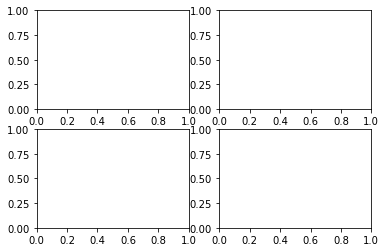

In [12]:
fig, axs = plt.subplots(nrows = 2,ncols = 2)

In [13]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f640908e390>,
      dtype=object)

In [ ]:
 fig, axs = plt.subplots(nrows = 2 ,ncols = 2)
    for ax, feature in zip(axs.flatten(), cols):
        print()

<a id="sec3.3"></a>
# 'barplots'

In [4]:
def barplots(cols, data, width_factor=1, height_factor=1):
    '''Barplots of counts for discrete numerical and categorical features'''
    #define number of rows and columns based on length of feature list
    ncols = min(math.ceil(len(cols)**0.5),4)
    nrows = math.ceil(len(cols)/ncols)
    #create plots looping through the feature list
    fig, axs = plt.subplots(nrows,ncols,figsize=(ncols*4*width_factor, nrows*4))
    for ax, feature in zip(axs.flatten(), cols):
        sns.barplot(x=data.groupby([feature])[feature].count().index,y=data.groupby([feature])[feature].count(), ax=ax)
        #set title and x-axis label rotation (here would be the place to add further axes methods)
        ax.set_title(feature)
        ax.tick_params(axis='x',labelrotation=45)
    #remove unused axs    
    unused_axs = (nrows*ncols)-len(cols)
    for unused_axs in range(unused_axs):
        axs[nrows-1, -1-unused_axs].remove()
    #snug fit!  
    fig.tight_layout(pad=1.5)

<a id="sec3.4"></a>
# 'distplots'

In [5]:
def distplots(cols, data,kde=False, width_factor=1, height_factor=1):
    '''Distribution plots for continuous numeric features'''
    # Define number of rows and columns based on length of feature list
    ncols = min(math.ceil(len(cols)**0.5),4)
    nrows = math.ceil(len(cols)/ncols)

    # if statement to deal with case of single figure 
    if len(cols) == 1:
        plt.figure(figsize=(6*width_factor,4*height_factor))
        plt.title(cols[0])
        sns.distplot(data[cols], kde=kde)
        
    # else for multi-plots loop through feature list 
    else:
        fig, axs = plt.subplots(nrows,ncols,figsize=(ncols*4*width_factor, nrows*4))
        for ax, feature in zip(axs.flatten(), cols):
            sns.distplot(data[feature], kde=kde, ax=ax)
            ax.set_title(feature)
            
        # Remove any unused axs    
        unused_axs = (nrows*ncols)-len(cols)
        for unused_axs in range(unused_axs):
            axs[nrows-1, -1-unused_axs].remove()
        # Create a snug fit!  
        fig.tight_layout(pad=1.5)

<a id="sec3.5"></a>
# 'barplots_mean_target'

In [6]:
def barplots_mean_target(cols, data, target, width_factor=1, height_factor=1):
    '''Barplots of mean target values across discrete numeric and categorical features
    automatic sizing and number of rows/columns'''
    #define number of rows and columns based on length of feature list
    ncols = min(math.ceil(len(cols)**0.5),4)
    nrows = math.ceil(len(cols)/ncols)
    #create plots looping through the feature list
    fig, axs = plt.subplots(nrows,ncols,figsize=(ncols*4*width_factor, nrows*4))
    for ax, feature in zip(axs.flatten(), cols):
        sns.barplot(x=data.groupby([feature])[feature].count().index,y=data.groupby([feature])[target].mean(), ax=ax)
        #set title, x-axis label rotation, and y-axis title
        ax.set_title(feature)
        ax.tick_params(axis='x',labelrotation=45)
        ax.set_ylabel('Mean '+target)
    #remove unused axs    
    unused_axs = (nrows*ncols)-len(cols)
    for unused_axs in range(unused_axs):
        axs[nrows-1, -1-unused_axs].remove()
    #snug fit!  
    fig.tight_layout(pad=1.5)

<a id="sec3.6"></a>
# 'scatterplots'

In [7]:
def scatterplots(cols, data, target, width_factor=1, height_factor=1):
    '''Scatterplots of numerical features versus target feature'''
    #define number of rows and columns based on length of feature list
    ncols = min(math.ceil(len(cols)**0.5),4)
    nrows = math.ceil(len(cols)/ncols)
    #create plots looping through the feature list
    fig, axs = plt.subplots(nrows,ncols, sharey=True, figsize=(ncols*4*width_factor, nrows*4))
    for ax, feature in zip(axs.flatten(), cols):
        sns.scatterplot(x=data[feature],y=data[target], ax=ax)
        #set title, x-axis label rotation, and y-axis title
        ax.set_title(feature)
        ax.tick_params(axis='x',labelrotation=45)
        ax.set_ylabel(target)
    #remove unused axs    
    unused_axs = (nrows*ncols)-len(cols)
    for unused_axs in range(unused_axs):
        axs[nrows-1, -1-unused_axs].remove()
    #snug fit!  
    fig.tight_layout(pad=1.5)

<a id="sec4"></a>
# Testing with Titanic Dataset

Now we need a dataset to test the functions on and the Titanic dataset is a pretty good place to start as it's familiar to most and doesn't require much cleaning before we can get out some meaningful plots.

In [8]:
#Load 'Titanic: Learning from Disaster' Dataset
train_data_path = '../input/titanic/train.csv'
TITANIC_DATA = pd.read_csv(train_data_path, index_col='PassengerId')

#Create new Categorical Feature 'Deck' from stripping the numbers from the cabin 
TITANIC_DATA['Deck'] = TITANIC_DATA['Cabin'].fillna('N').map(lambda c : c.rstrip('0123456789')[-1] if 'N' not in c else float('nan'))

<a id="sec4.2"></a>
# 'Create Feature Lists' Function
Here we need a quick function to create the different feature lists for input into the plotting functions - based on some simple rules to define discrete-numeric, continuous-numeric, and categorical features (with cardinality low pass filter).

By no means is this fool-proof! Most datasets will need a bit more work than this one and there is no substitute for reading any supporting docs with the dataset or some amateur sleuthing in-lieu of high-quality feature info!

In [9]:
def create_feature_lists(data):
    '''Create lists of all_numeric, continuous_numeric (>25 unique values), discrete_numeric, 
    and categorical features excluding high-cardinality features < 13'''
    NUM_FEAT = [feature for feature in data.columns if data[feature].dtype == 'int64' or data[feature].dtype == 'float64']
    CONT_FEAT = [feature for feature in NUM_FEAT if len(data[feature].unique()) > 25]
    DISC_FEAT = [feature for feature in NUM_FEAT if len(data[feature].unique()) < 25]
    CAT_FEAT = [feature for feature in data.columns if data[feature].dtype == 'object' and len(data[feature].unique()) < 13
               or data[feature].dtype == 'bool']
    
    return NUM_FEAT, CONT_FEAT, DISC_FEAT, CAT_FEAT


#Run Create Feature List Function
TT_NUM_FEAT, TT_CONT_FEAT, TT_DISC_FEAT, TT_CAT_FEAT = create_feature_lists(TITANIC_DATA)

<a id="sec4.3"></a>
# Distplots Function Test

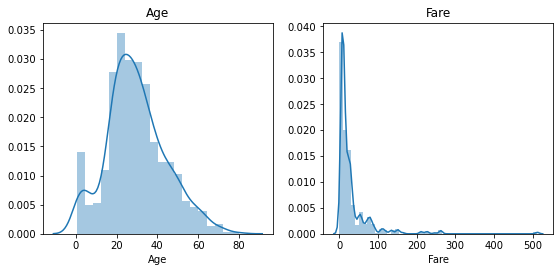

In [10]:
distplots(TT_CONT_FEAT, TITANIC_DATA, kde=True)
#Save figure as png for Markdown box at the top of the page
plt.savefig('Sample.png')

<a id="sec4.4"></a>
# Distplots Function with Single Feature Input

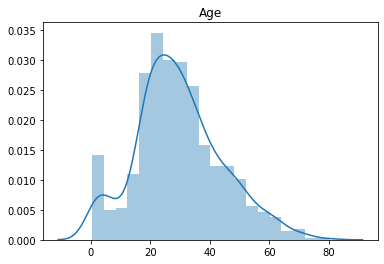

In [11]:
distplots(['Age'], TITANIC_DATA, kde=True)

<a id="sec4.5"></a>
# Countplots Function (with Categorical Data)

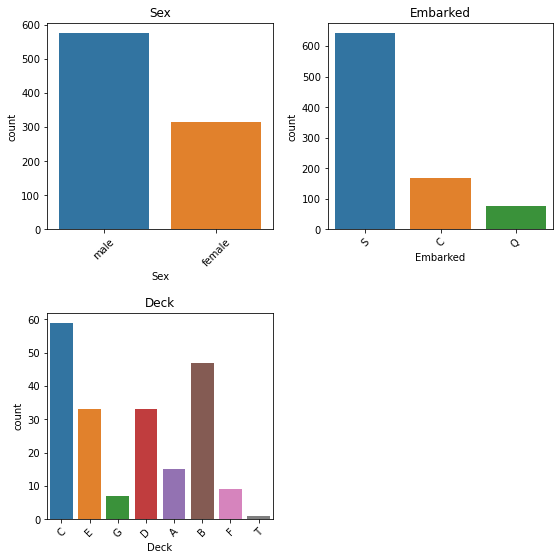

In [12]:
countplots(TT_CAT_FEAT, TITANIC_DATA)

<a id="sec4.6"></a>
# Countplots-by-Target Function (Categorical Data)

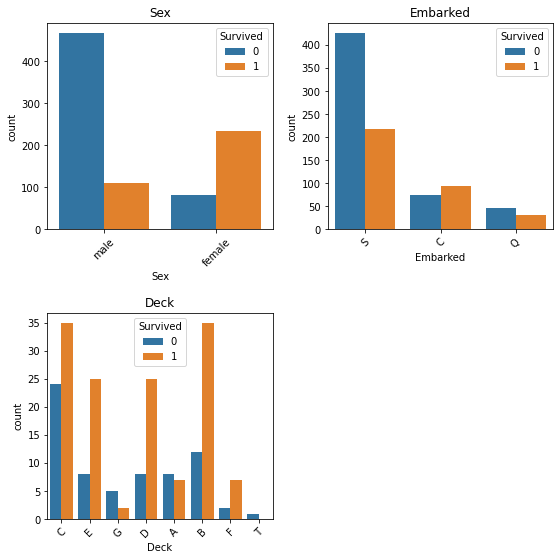

In [13]:
countplots_by_target(TT_CAT_FEAT, TITANIC_DATA,'Survived')

<a id="sec4.7"></a>
# Countplots-by-Target Function (Discrete Numerical Data)

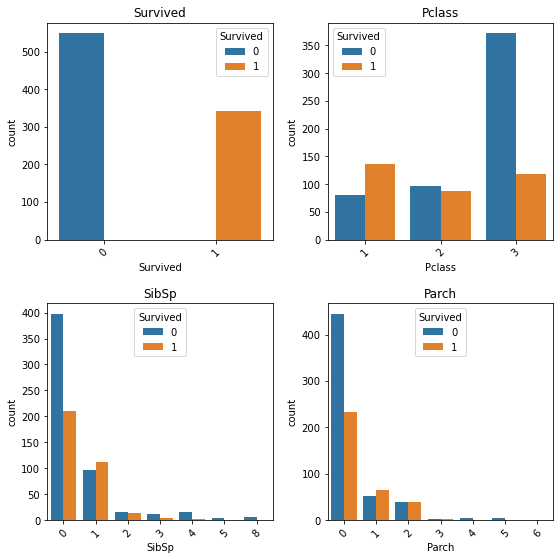

In [14]:
countplots_by_target(TT_DISC_FEAT, TITANIC_DATA, 'Survived')

<a id="sec4.8"></a>
# Countplots by Target Function (Using Alternative Feature)

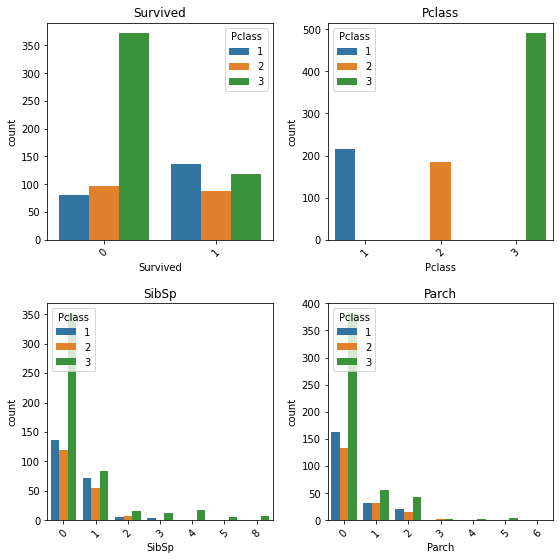

In [15]:
countplots_by_target(TT_DISC_FEAT, TITANIC_DATA, 'Pclass')

<a id="sec5"></a>
# Testing With Iowa House Prices Dataset

In [16]:
#Import Data

#Load 'Iowa House Price Prediction Competition' Dataset
house_prices_data_path = '../input/house-prices-advanced-regression-techniques/train.csv'
HOUSE_PRICE_DATA = pd.read_csv(house_prices_data_path, index_col='Id')

In [17]:
#create feature name lists
HP_NUM_FEAT, HP_CONT_FEAT, HP_DISC_FEAT, HP_CAT_FEAT = create_feature_lists(HOUSE_PRICE_DATA)


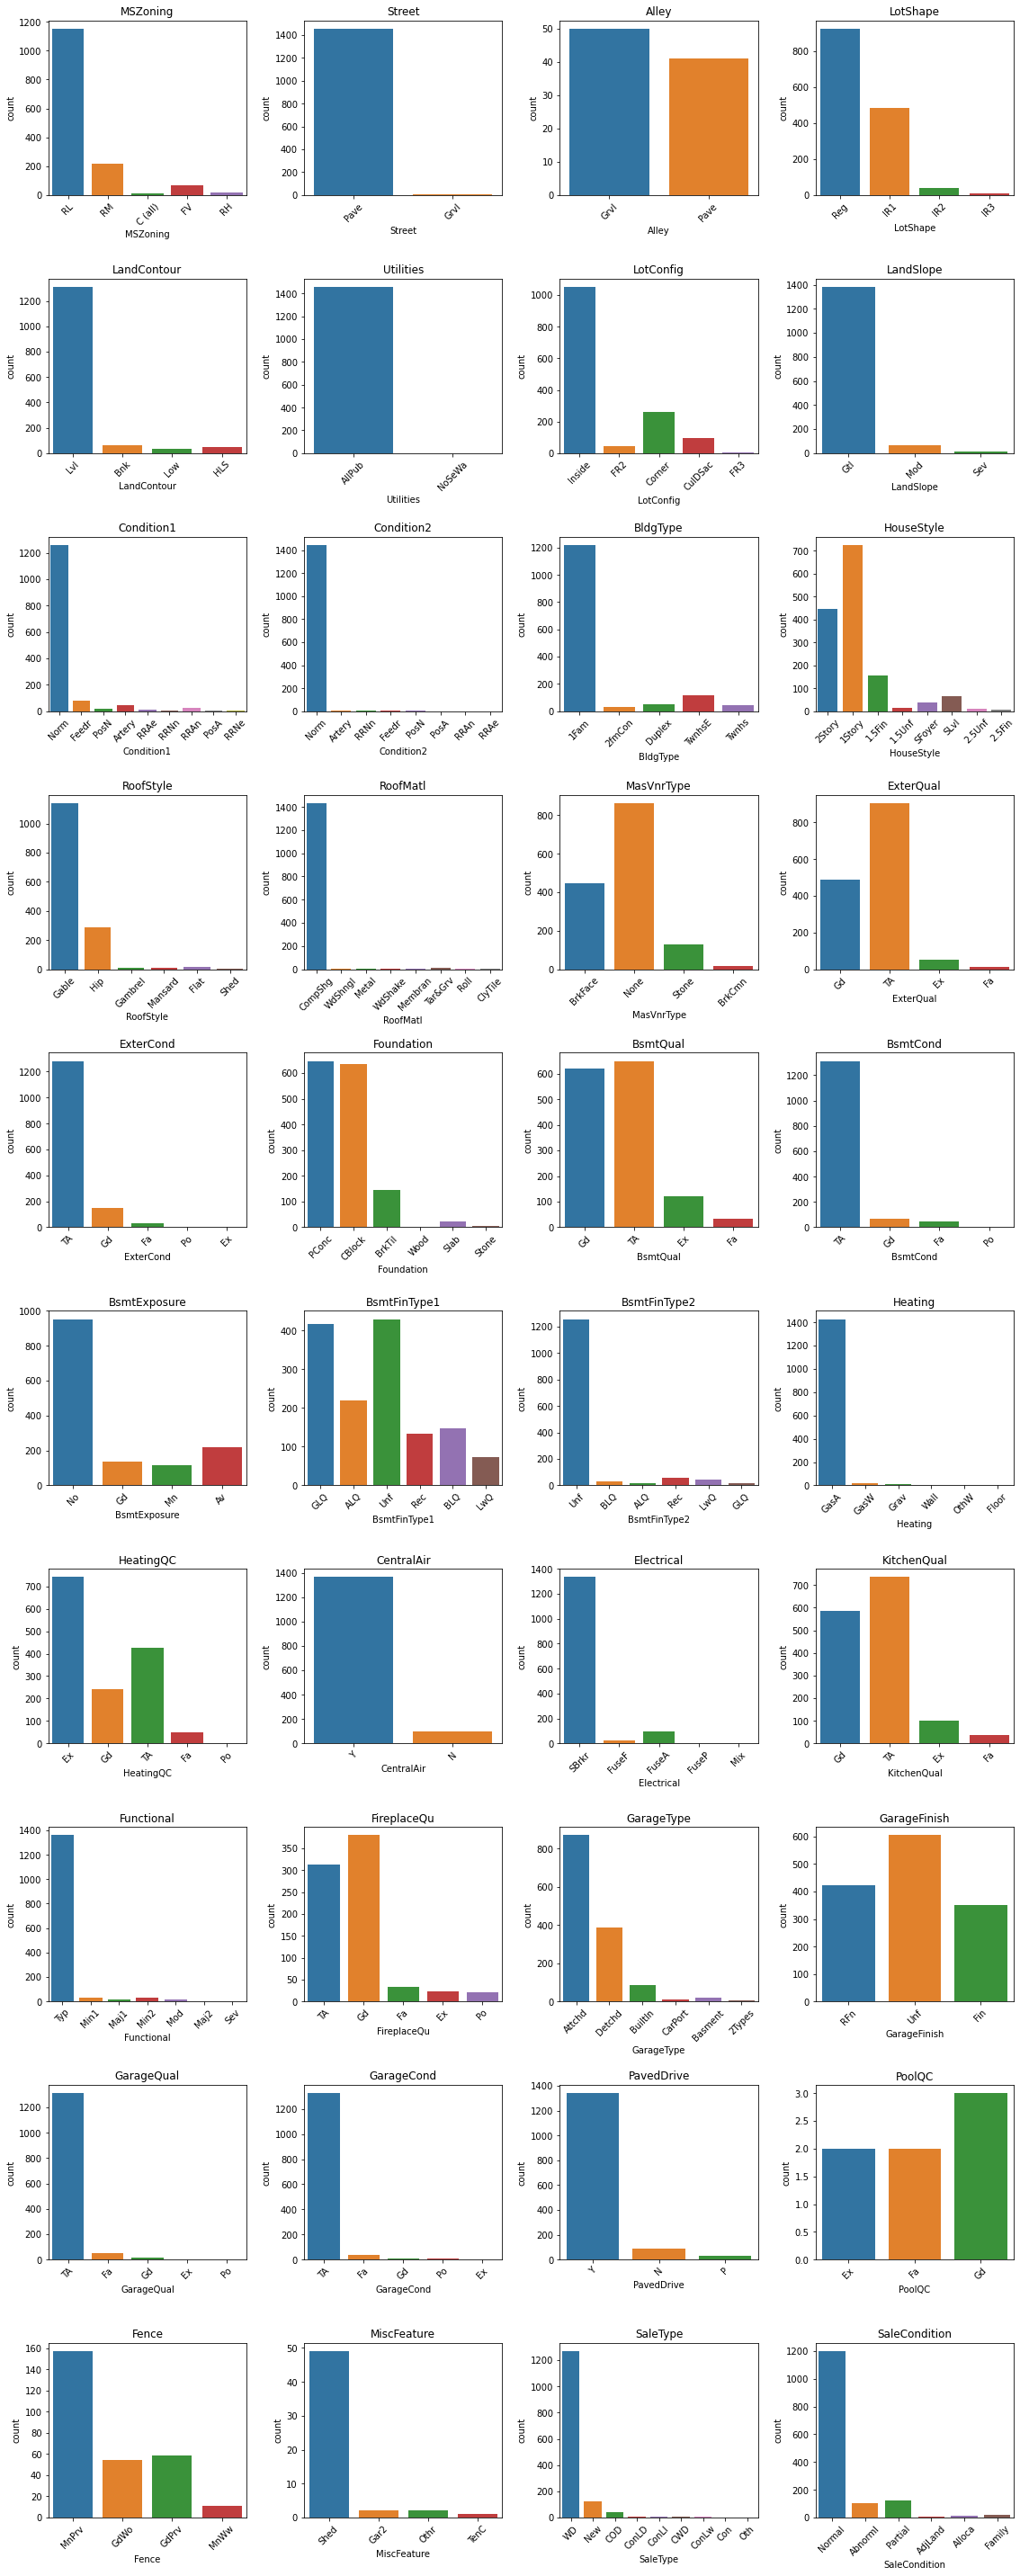

In [18]:
#countplots for categorical data
countplots(HP_CAT_FEAT, HOUSE_PRICE_DATA, width_factor=1, height_factor=1)

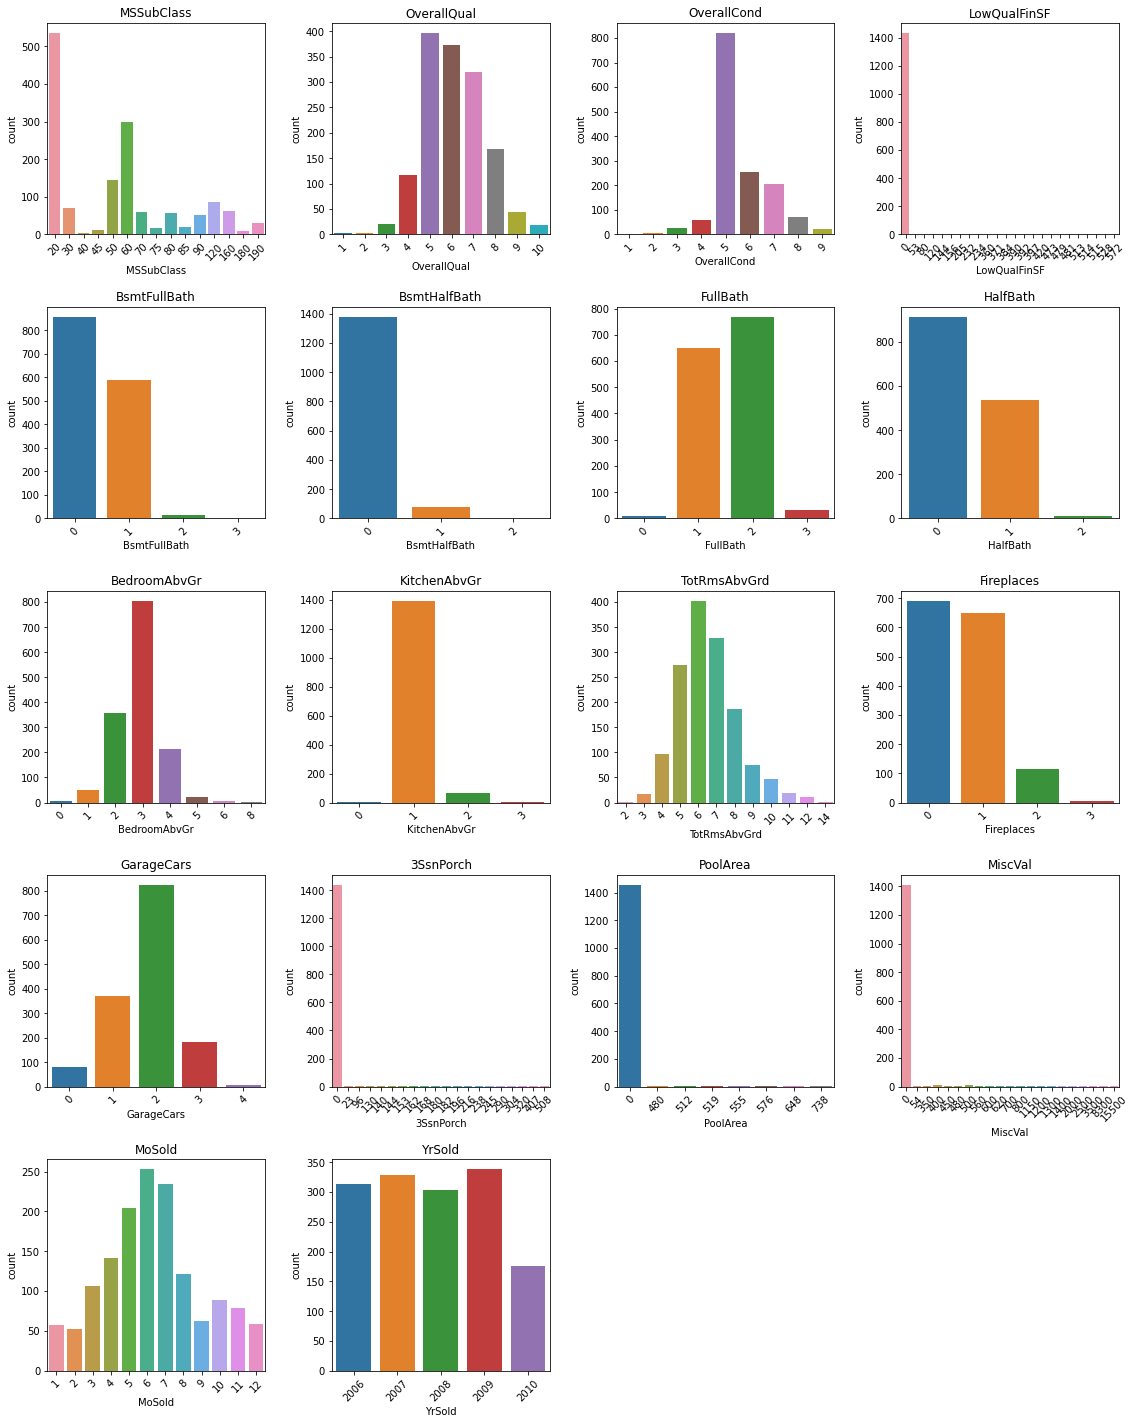

In [19]:
#countplots for discrete numerical data
countplots(HP_DISC_FEAT, HOUSE_PRICE_DATA, width_factor=1, height_factor=1)

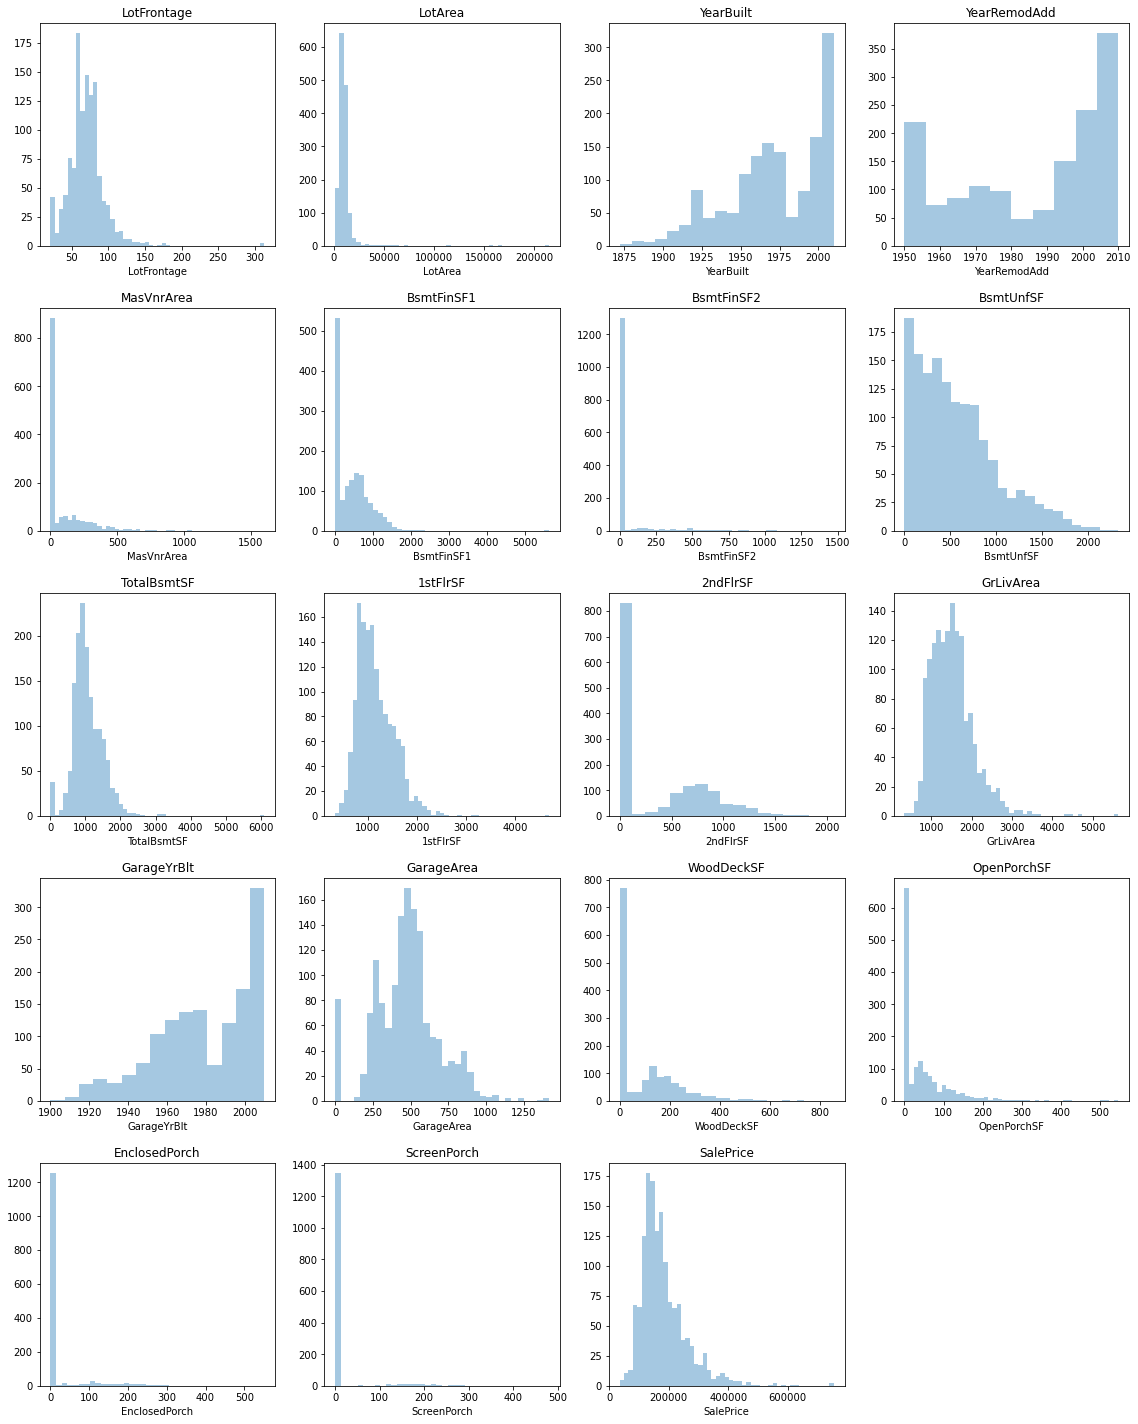

In [20]:
#Note: No argument given for kde, thus it defaults to False. Seaborn kde is sometimes problematic when plotting lots of unprocessed features
distplots(HP_CONT_FEAT, HOUSE_PRICE_DATA)

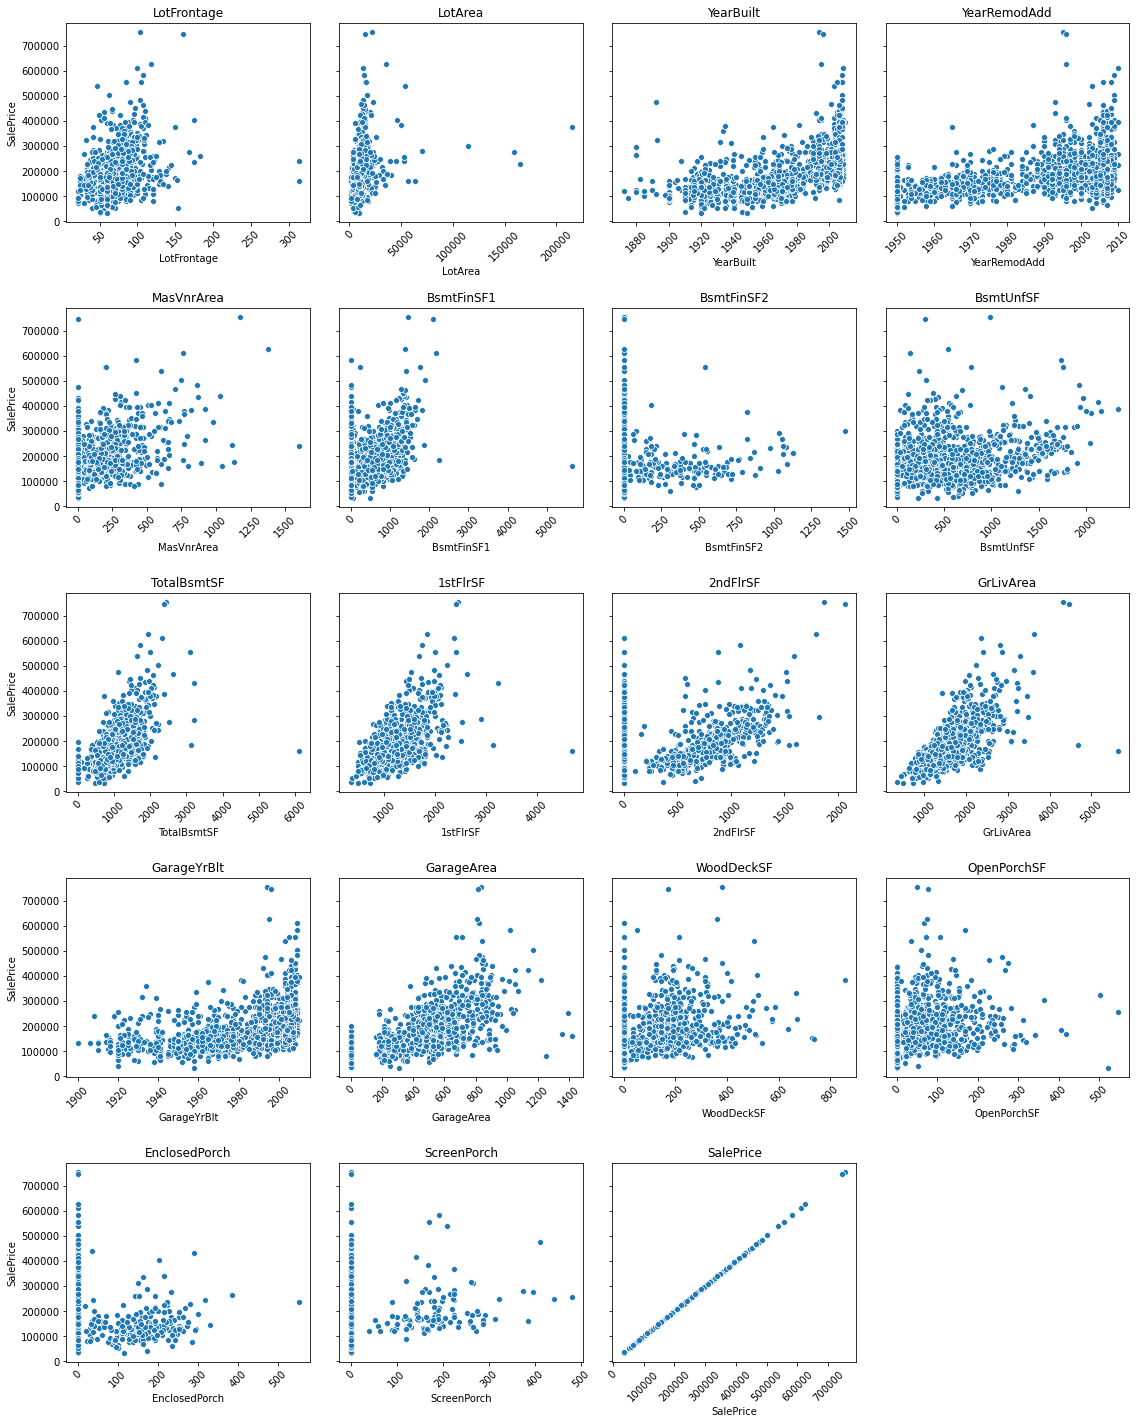

In [21]:
#Scatter plots for continuous numerical features
scatterplots(HP_CONT_FEAT, HOUSE_PRICE_DATA, 'SalePrice', width_factor=1, height_factor=1)

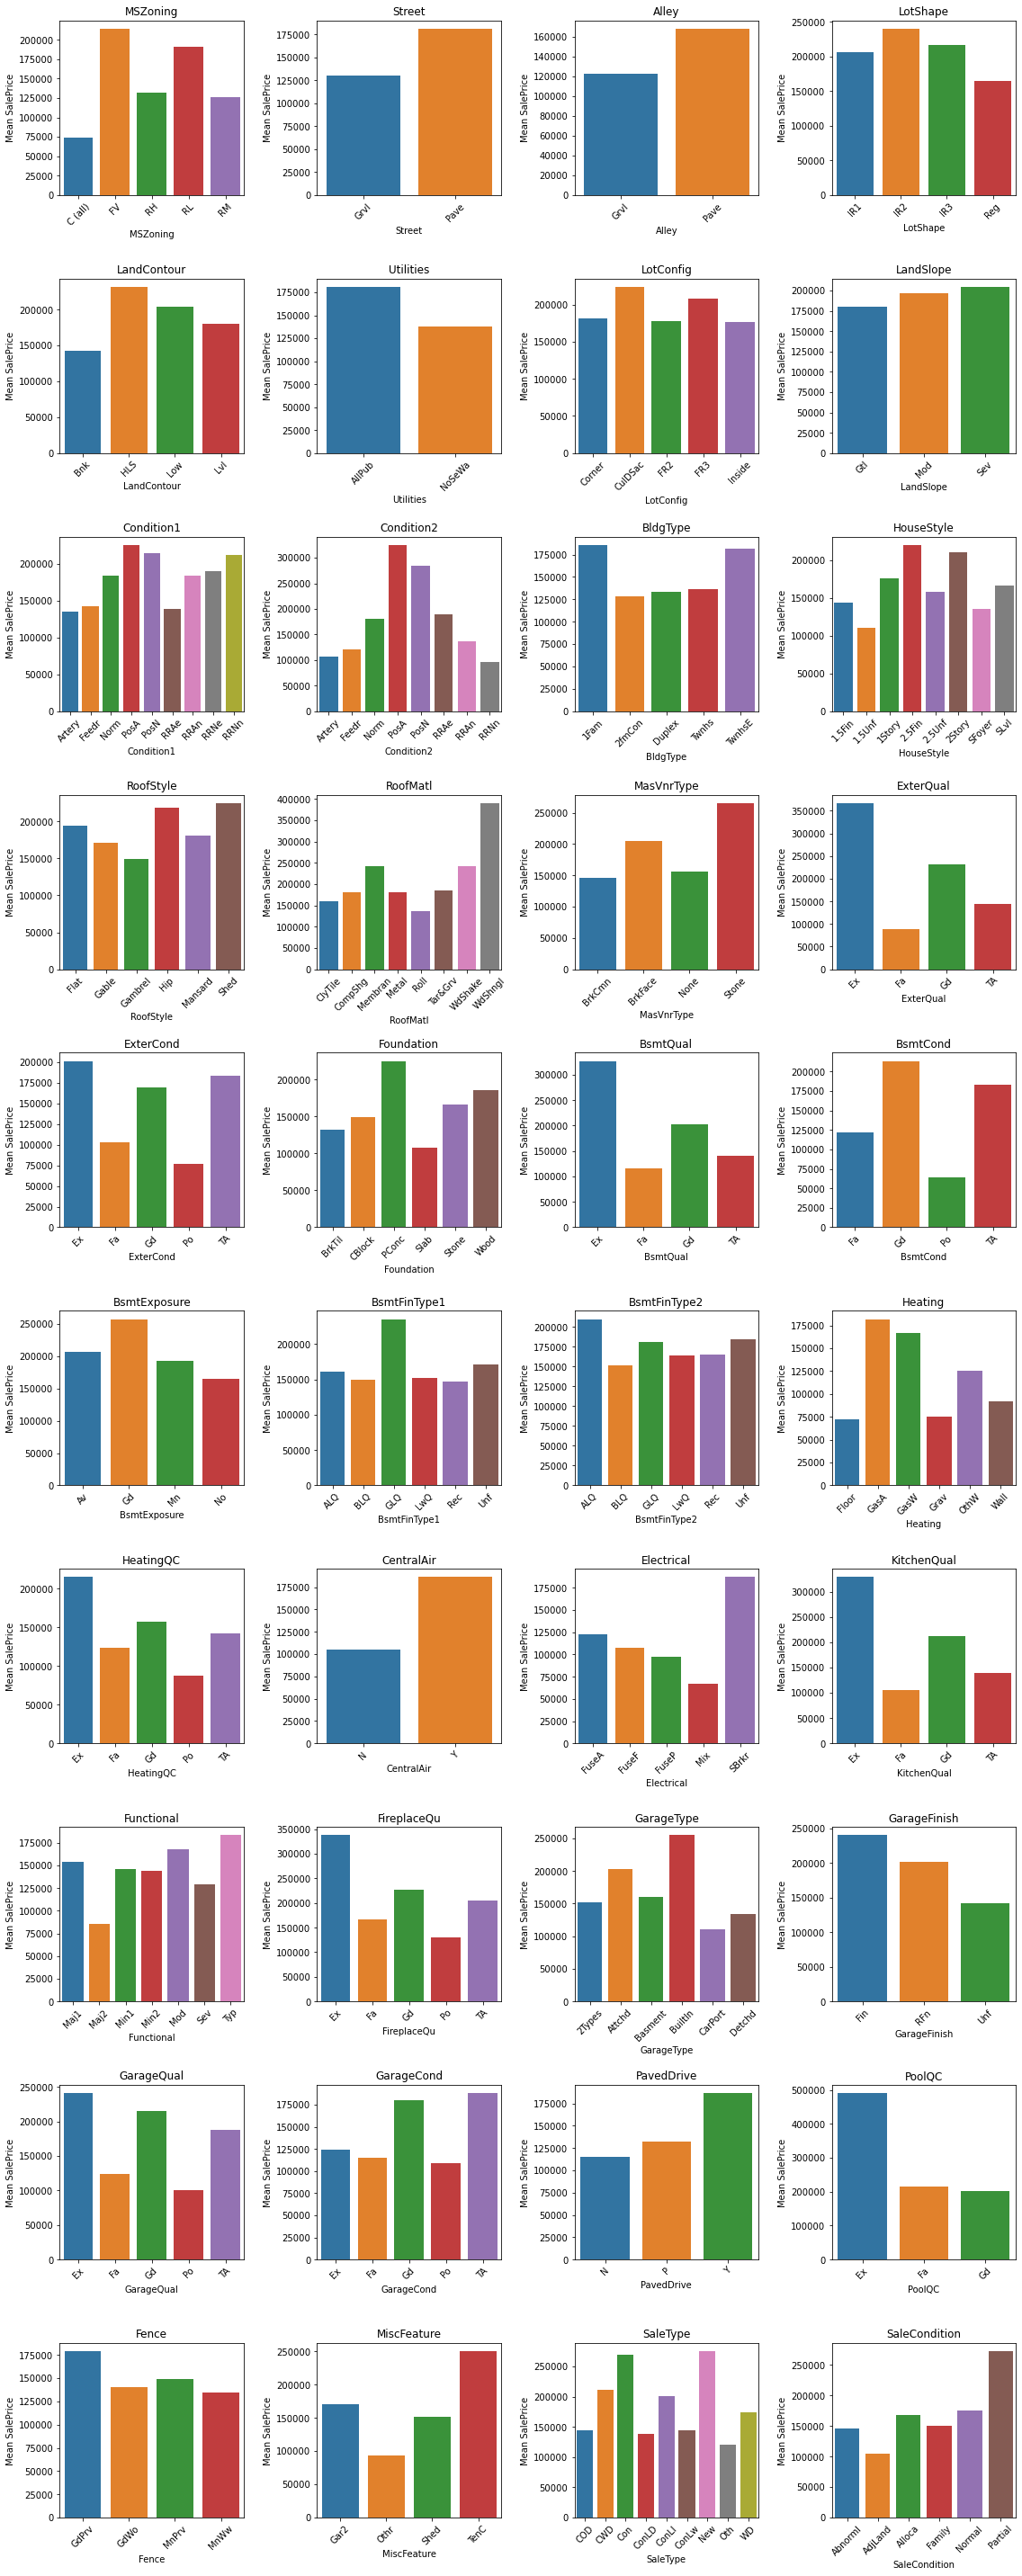

In [22]:
#barplots_mean_target for plotting mean target values across categorical variables
barplots_mean_target(HP_CAT_FEAT, HOUSE_PRICE_DATA, 'SalePrice', width_factor=1, height_factor=1)

<a id="sec6"></a>
# Bonus Round - Flatten and Zip Functions

Below is a visualisation of the [zip](https://docs.python.org/3.3/library/functions.html) and [flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) functions used in the plotting functions above. 

Firstly axs.flatten() collapses the axs array created by subplots into a 1-d array (from (2,2) array to (4,1) array in the example below). Python zip() function then groups each feature that you want to plot with an specific subplot in a zip object, which can then be iterated through to produce the intended multi-plot figure. Simples!

I like to do this type of visualisation of objects when learning about new functions or solving tricky problems. I find it a really useful way of making sense of what I (or somebody else in the case of shameless plagiarism!) is doing, breaking it down step by step.


Visualisation of Zip object created using numpy.flatten() function:


[(<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c80e2810>, 'Survived'),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c90b34d0>, 'Pclass'),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c7f6a950>, 'SibSp'),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c7f5bed0>, 'Parch')]

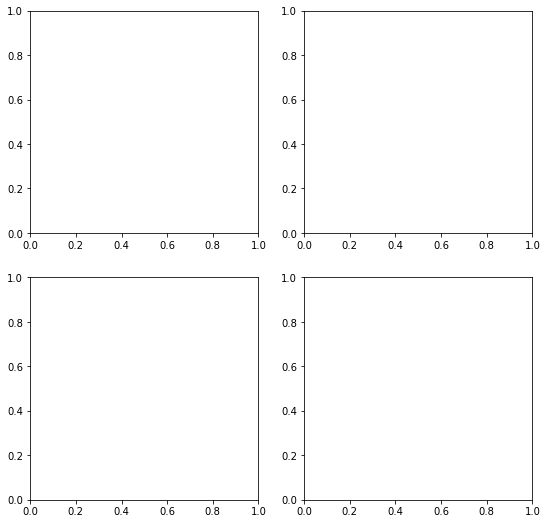

In [23]:
#Define figure and axes
fig, axs = plt.subplots(2,2,figsize=(9, 9))

print('''\nVisualisation of Zip object created using numpy.flatten() function:''')

# Zip up axs.flatten() and feature list to create iterable for assigning data to subplots
[(ax,feature) for (ax,feature) in zip(axs.flatten(), TT_DISC_FEAT)]